<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [20]:
student_number = "401106663"
full_name = "Arian Noori"
assert student_number and full_name is not None, 'please input your information'

In [21]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [22]:
df = pd.read_csv('dataset.csv')
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

Display dataset information.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: CUST_ID, it's just a unique identifier and not useful for clustering

In [24]:
df = df.drop(columns=['CUST_ID'])
print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

how do you handle missing data, and why did you choose this method?
<br>
Answer: we can use metrics like mean or median instead of null values

In [25]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

plot the correlation matrix and identify redundant features.remove them from the dataframe.

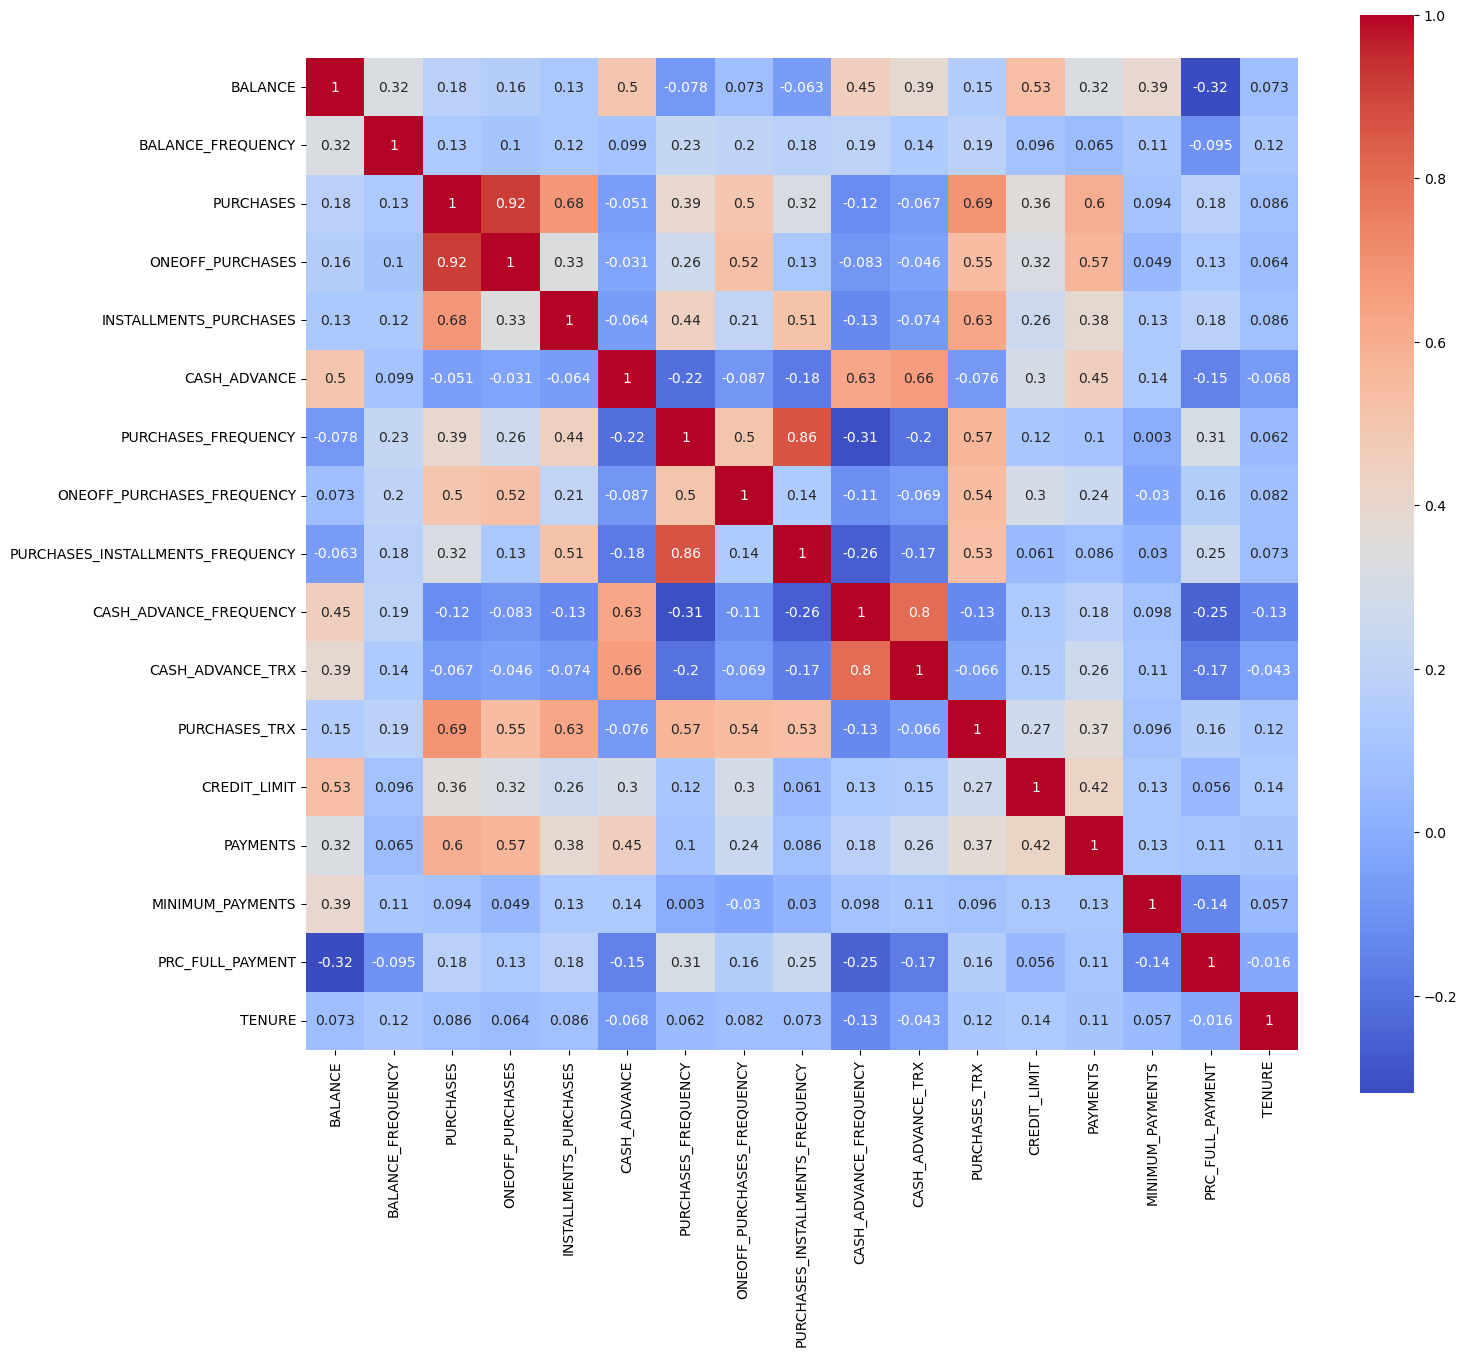

In [26]:
mat = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 14))  # Increase the figure size
sns.heatmap(mat, annot=True, cmap='coolwarm', square=True, cbar=True)


plt.show()

In [27]:
upper_triangle = mat.where(np.triu(np.ones(mat.shape), k=1).astype(bool))

to_remove = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > 0.8)]

df.drop(columns = to_remove, inplace=True)

# Print the features that were removed
print("Removed features:", to_remove)

Removed features: ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [28]:
scalar = StandardScaler()

df = pd.DataFrame(scalar.fit_transform(df) , columns = df.columns)
print(df.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.731989          -0.249434  -0.424900               -0.349079   
1  0.786961           0.134325  -0.469552               -0.454576   
2  0.447135           0.518084  -0.107668               -0.454576   
3  0.049099          -1.016953   0.232058               -0.454576   
4 -0.358775           0.518084  -0.462063               -0.454576   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0     -0.466786            -0.806490                   -0.678661   
1      2.605605            -1.221758                   -0.678661   
2     -0.466786             1.269843                    2.673451   
3     -0.368653            -1.014125                   -0.399319   
4     -0.466786            -1.014125                   -0.399319   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.57396

Why is it important to standardize the data before applying PCA?
<br>
Answer: Standardizing data is crucial for PCA because it ensures that all features contribute equally by centering the data around the mean (0) and scaling to unit variance. This prevents features with larger scales from disproportionately influencing the principal components.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer: The Normalizer scales individual samples to have unit norm, focusing on the direction of data, while the StandardScaler standardizes features to have a mean of 0 and a standard deviation of 1, preserving their variance. For PCA, StandardScaler is preferred as it helps capture the principal components that explain the most variance.

## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [29]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        self.mean = np.mean(X , axis = 0)
        X -= self.mean
        
        covariance_matrix = np.cov(X , rowvar = False)
        eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)
        
        sorted_indexes = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[sorted_indexes]
        eigen_vectors = eigen_vectors[:, sorted_indexes]
        
        self.components = eigen_vectors
        self.explained_variance_ratio = eigen_values / np.sum(eigen_values)
        
        

    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        X -= self.mean
        X = np.dot(X , self.components)
        return X


    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer: In the bottom you can see the figure, using six components we can achieve 75% of variance

25.39%
47.64%
56.32%
63.89%
70.48%
76.06%
81.38%
85.76%
89.49%
92.55%
94.57%
96.25%
97.84%
99.00%
100.00%


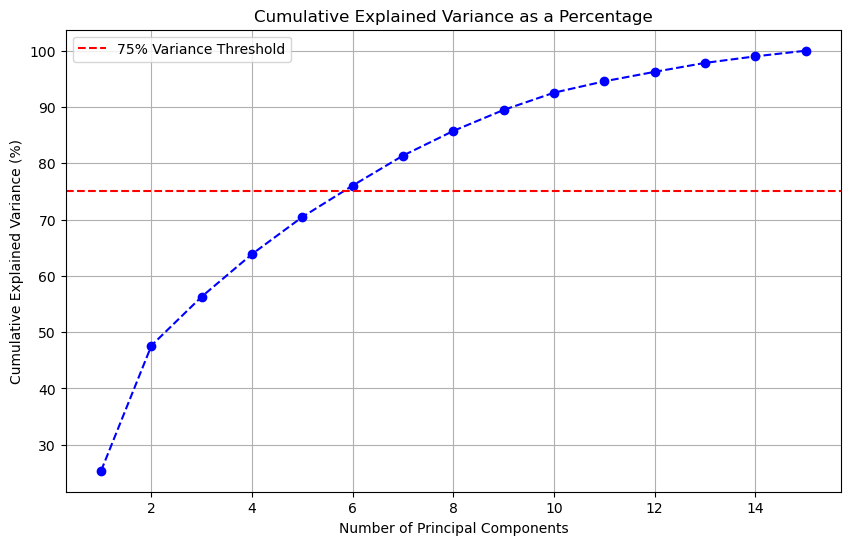

In [31]:
pca = CustomPCA(15)
pca.fit(df)

X_ = pca.transform(df)
cumsum = np.cumsum(pca.get_explained_variance_ratio())
cumsum_percentage = cumsum * 100



for i, value in enumerate(cumsum_percentage):
    print(f"{value:.2f}%")



# Plot the cumulative explained variance as a percentage
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumsum_percentage) + 1), cumsum_percentage, marker='o', linestyle='--', color='b')
plt.axhline(y=75, color='r', linestyle='--', label='75% Variance Threshold')  # Draw a line at 75%
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance as a Percentage')
plt.grid(True)
plt.legend()
plt.show()


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [32]:
selected_components = X_[:, :6]

df_pca = pd.DataFrame(selected_components, columns=[f'PC{i+1}' for i in range(6)])
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0  1.728541 -0.833445  0.384363 -0.429897 -0.118070  0.486503
1  0.312835  2.531537 -0.615274 -0.912451 -0.845063  0.004857
2 -1.197318 -0.883804  1.177909  1.172951 -1.072885 -1.898819
3  0.904752  0.002158  0.236403 -1.354837 -0.441498 -0.780313
4  1.498611 -0.526780  0.787691 -0.088656 -0.275036  0.367269


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

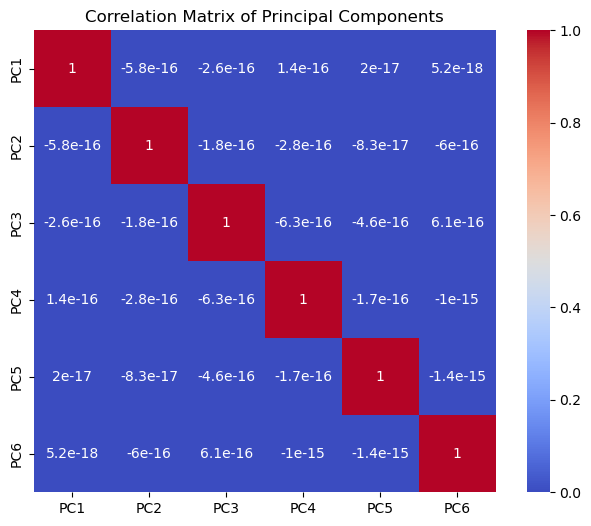

In [33]:
correlation_matrix = df_pca.corr()



plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar=True, 
            xticklabels=[f'PC{i+1}' for i in range(6)], 
            yticklabels=[f'PC{i+1}' for i in range(6)])
plt.title('Correlation Matrix of Principal Components')
plt.show()

## KMeans (45 points)
Implement kmeans from scratch.

In [34]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            
            distances = self._calculate_distances(X)
            self.labels_ = np.argmin(distances, axis=1)
            new_centroids = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

        self.inertia_ = self._calculate_inertia(X)

        return self

    def _calculate_distances(self, X):
        """
        Calculate the Euclidean distance from each point to each centroid.
        X: Input data (n_samples, n_features)
        Returns: distances (n_samples, n_clusters)
        """
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return distances

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        inertia = 0.0
        for i in range(self.n_clusters):
            inertia += np.sum(np.square(X[self.labels_ == i] - self.centroids[i]))
        return inertia

### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters? I take the optimak K = 6

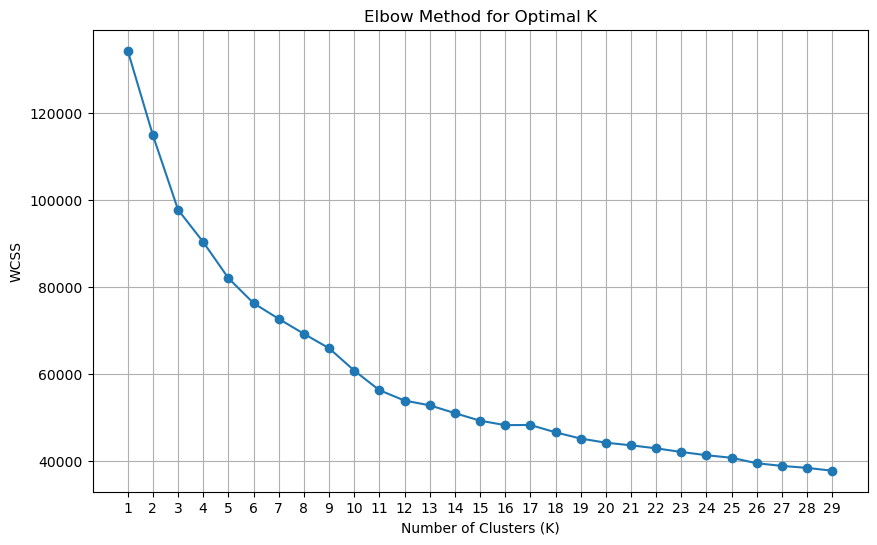

In [35]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []


# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)
    
    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(X_)
    
    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), WCSS, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 30))
plt.grid()
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [36]:
kmeans_optimal = CustomKMeans(n_clusters = 6)
kmeans_optimal.fit(selected_components)

df_pca['segment'] = kmeans_optimal.labels_

print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6  segment
0  1.728541 -0.833445  0.384363 -0.429897 -0.118070  0.486503        5
1  0.312835  2.531537 -0.615274 -0.912451 -0.845063  0.004857        1
2 -1.197318 -0.883804  1.177909  1.172951 -1.072885 -1.898819        3
3  0.904752  0.002158  0.236403 -1.354837 -0.441498 -0.780313        5
4  1.498611 -0.526780  0.787691 -0.088656 -0.275036  0.367269        5


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


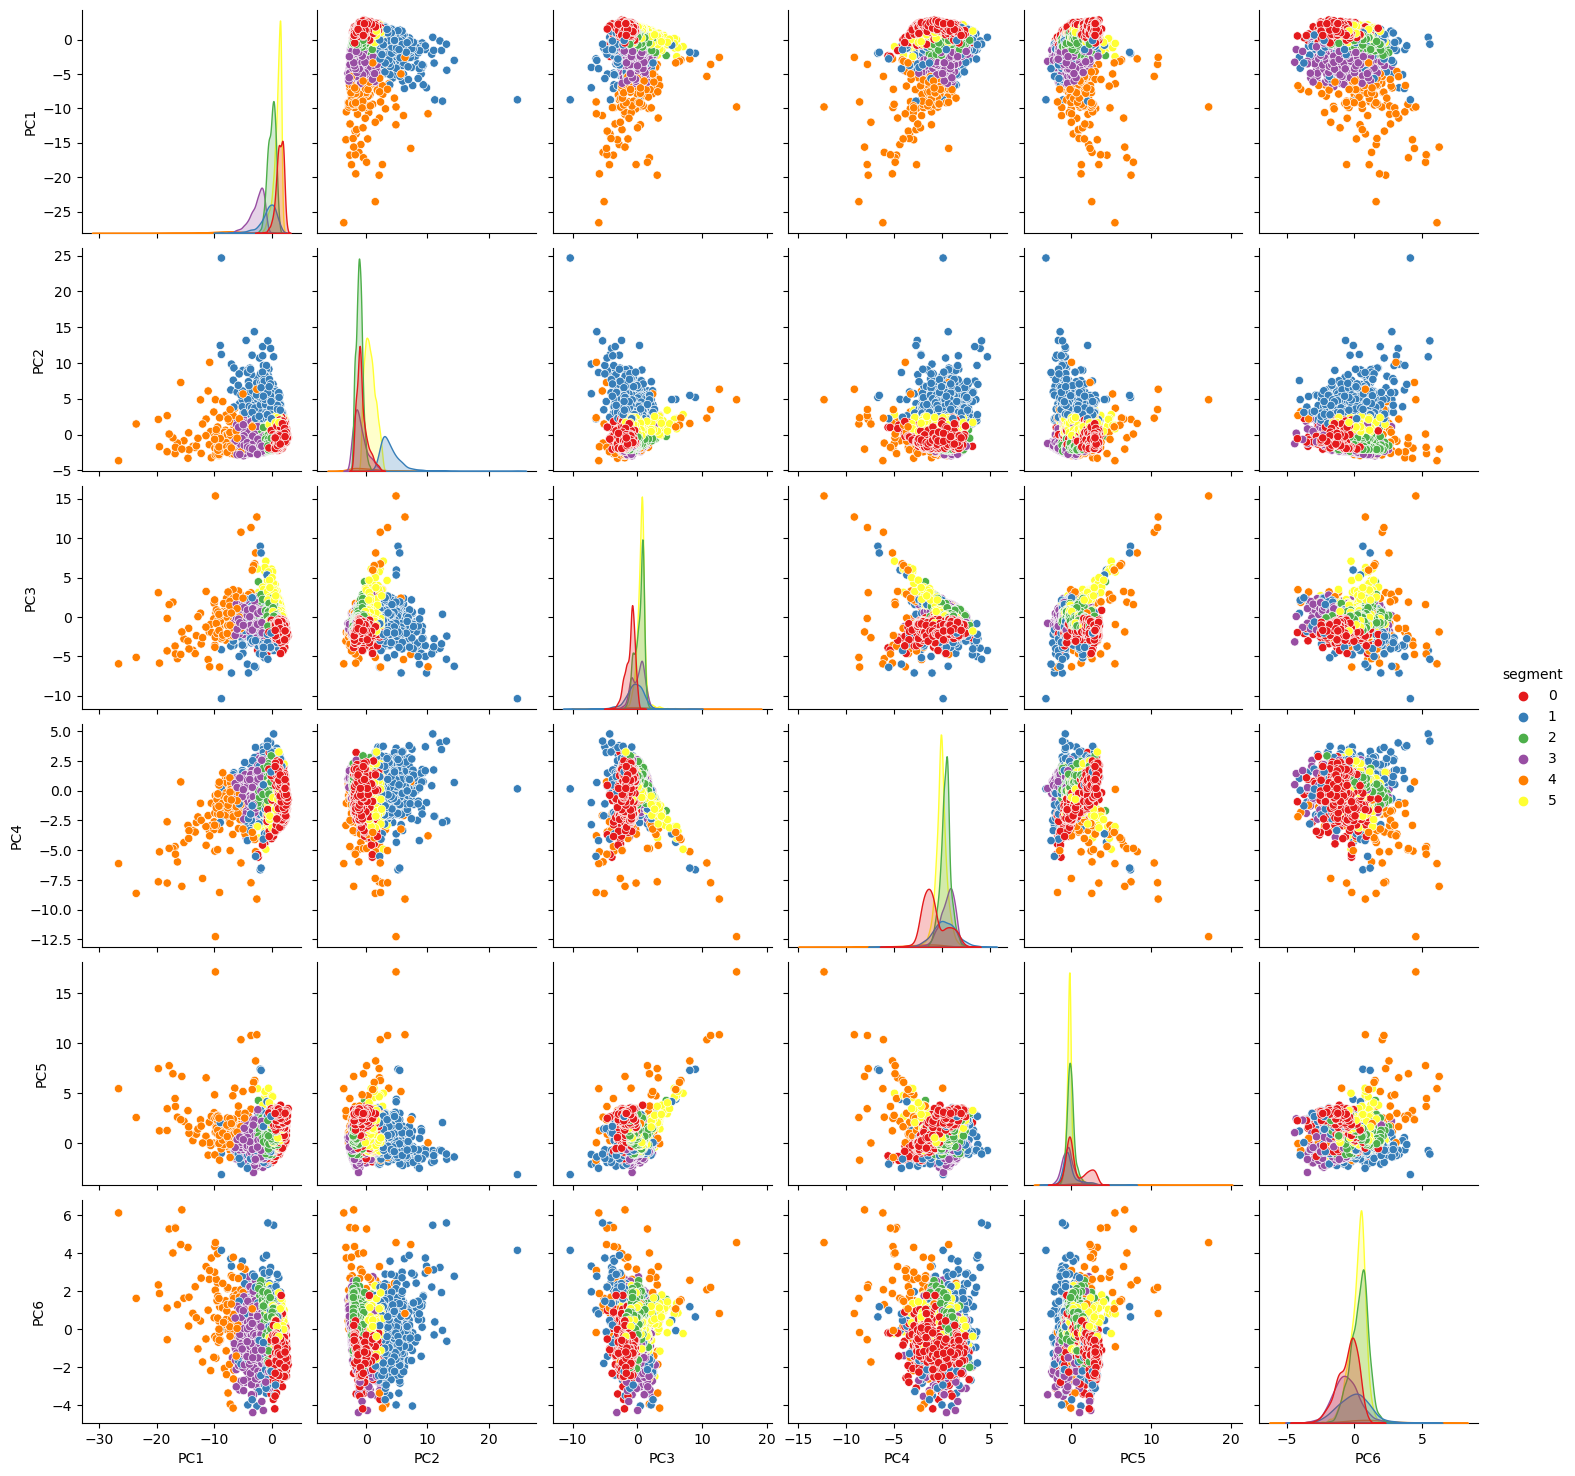

In [38]:
sns.pairplot(df_pca, hue='segment', palette='Set1', diag_kind='kde')

plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


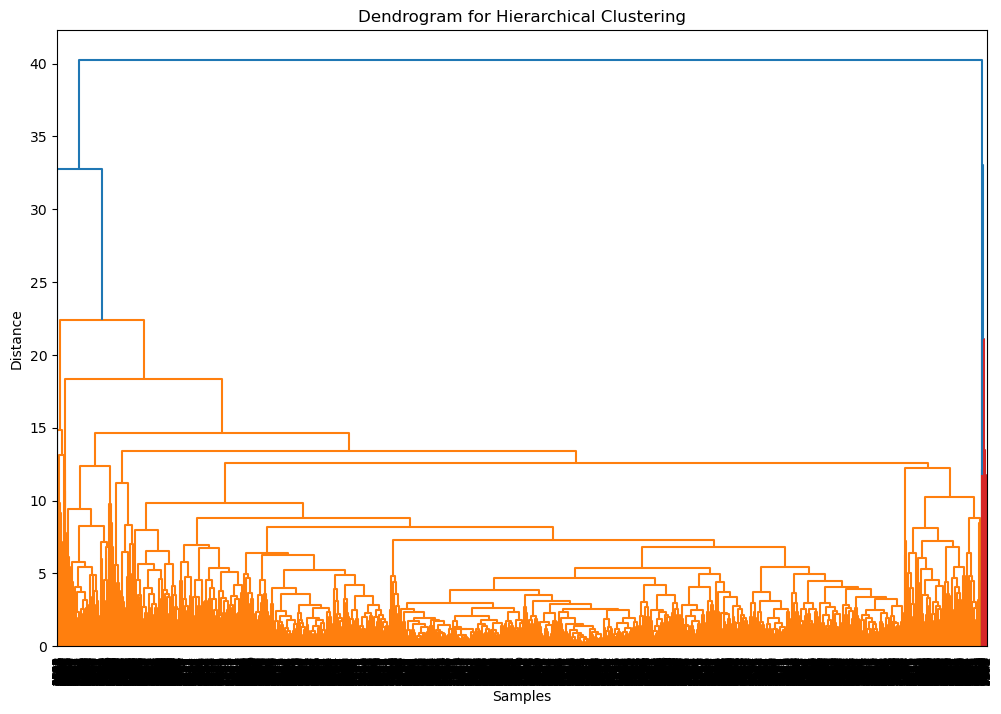

In [39]:
linkage_matrix = linkage(selected_components, method='complete')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df_pca.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


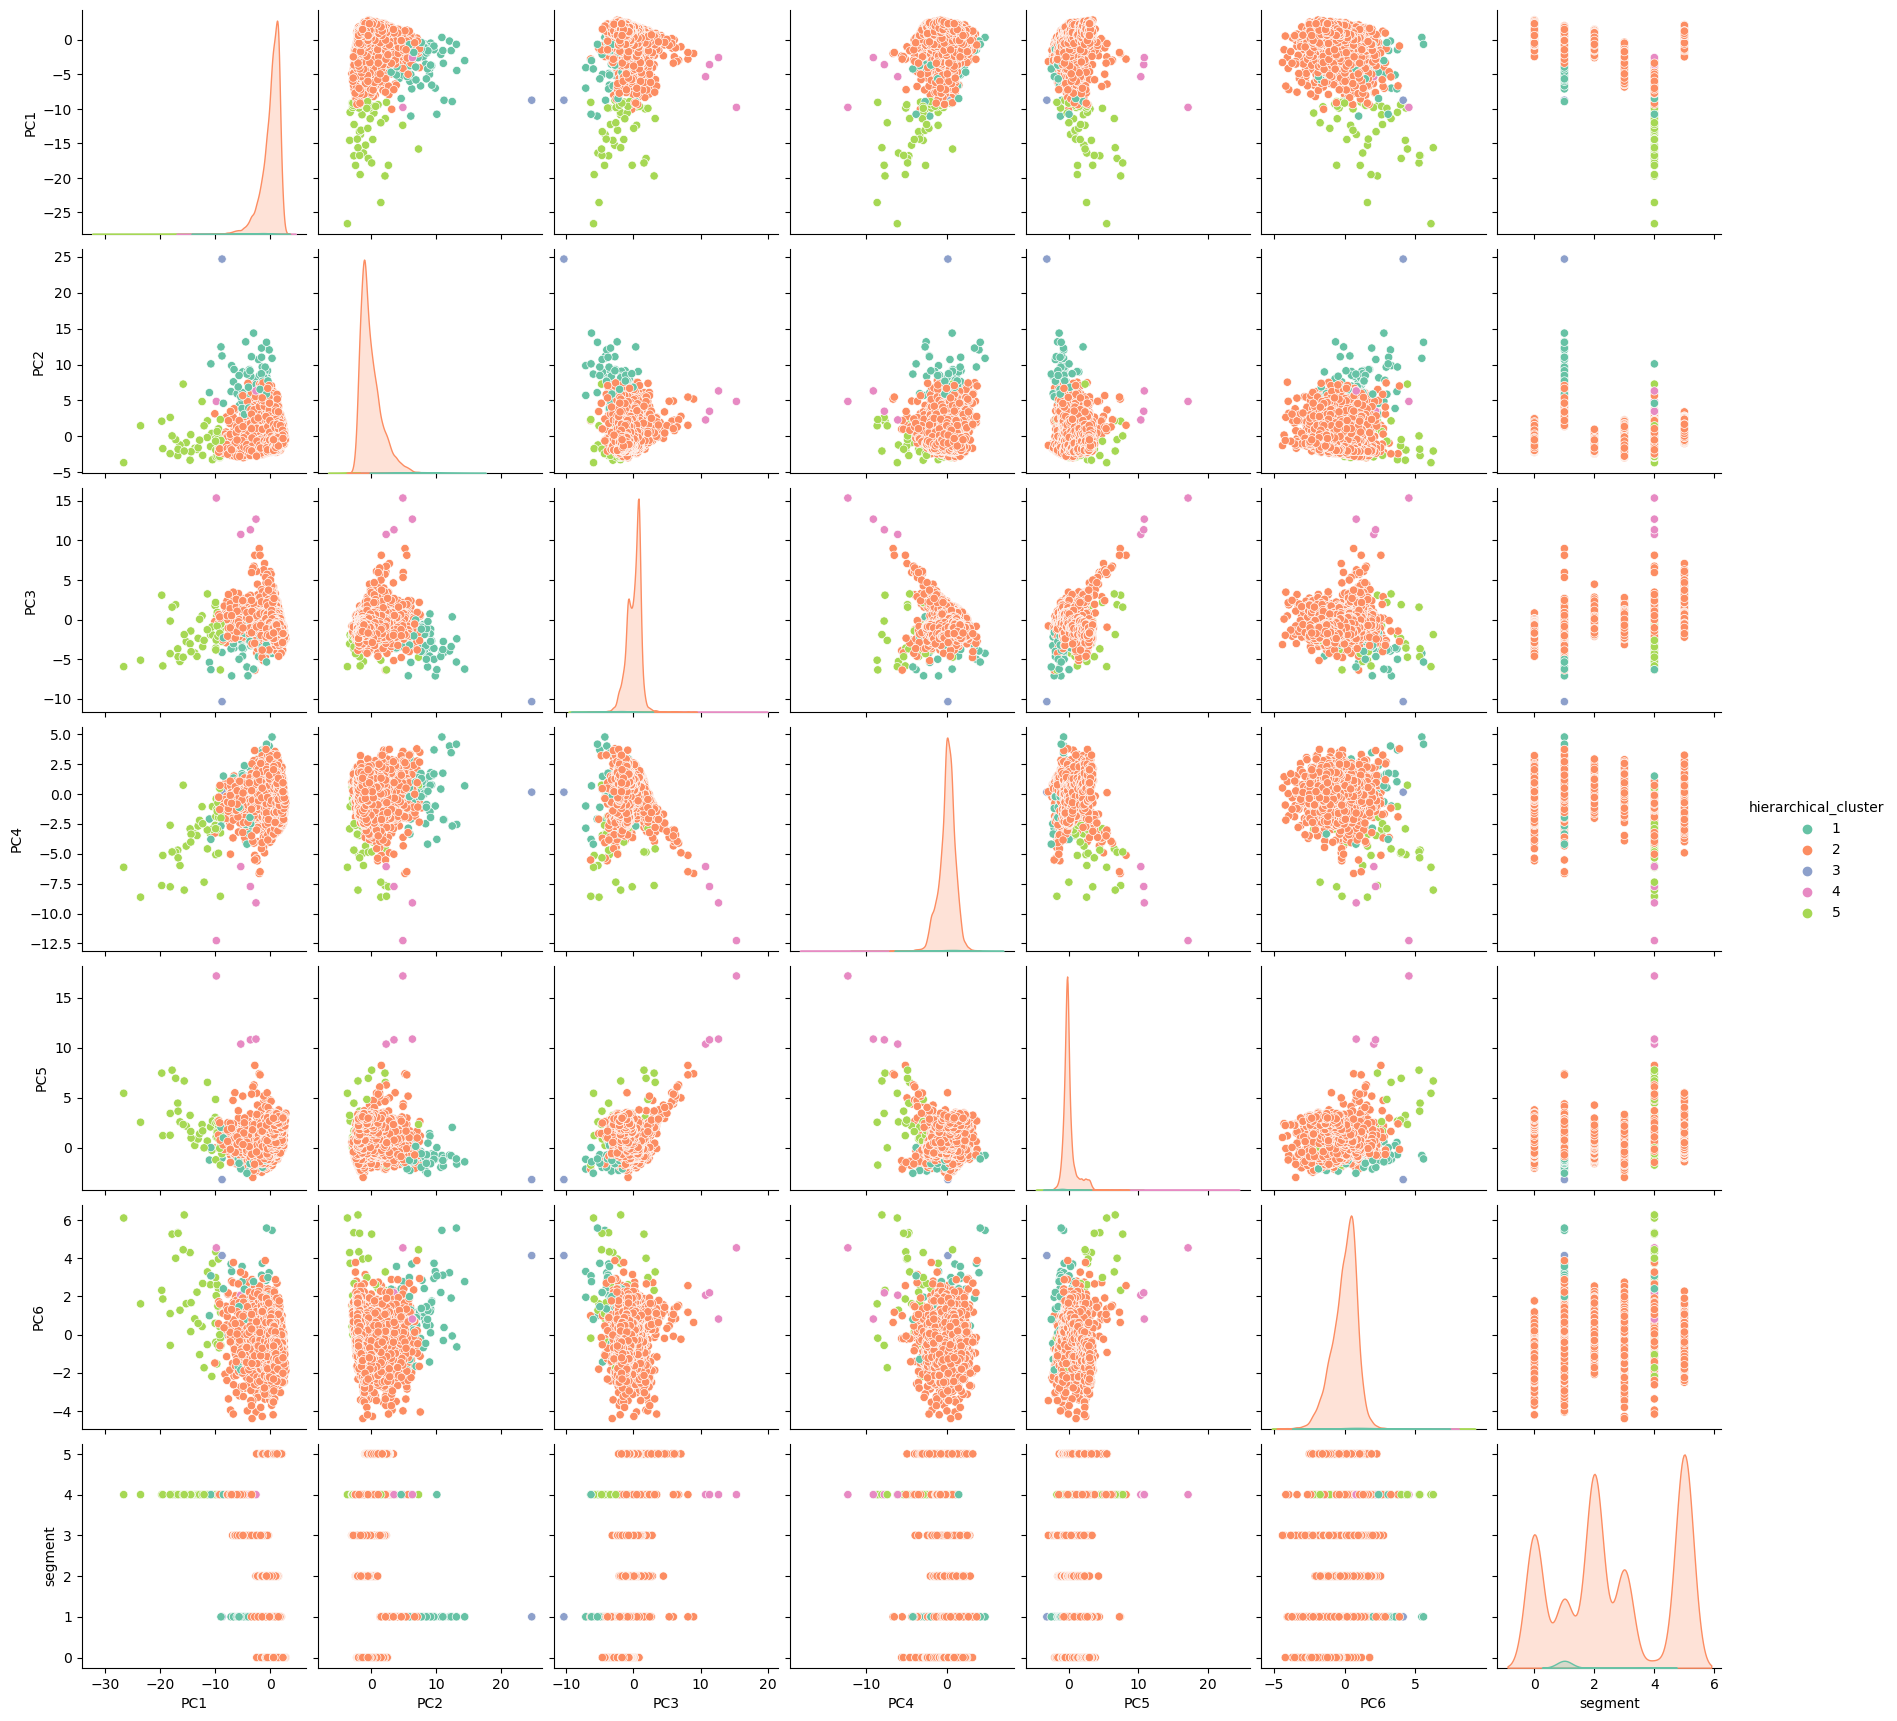

In [40]:
cluster_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')

df_pca['hierarchical_cluster'] = cluster_labels


sns.pairplot(df_pca, hue='hierarchical_cluster', palette='Set2', diag_kind='kde')

plt.show()